In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [16]:
data_path = 'Fish_Dataset/Fish_Dataset/'  # укажите путь к извлеченному набору данных
class1 = 'Shrimpp'  # Первый класс
class2 = 'Sea Bass'

# Создание генераторов изображений для обучения и тестирования
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

In [17]:
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training',
    classes=[class1, class2]
)

Found 1600 images belonging to 2 classes.


In [18]:
validation_generator = datagen.flow_from_directory(
    data_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    classes=[class1, class2]
)

Found 400 images belonging to 2 classes.


In [19]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

Epoch 1/10
25/25 [==============================] - 14s 529ms/step - loss: 0.0279 - accuracy: 0.9850 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
25/25 [==============================] - 10s 409ms/step - loss: 8.2370e-37 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
25/25 [==============================] - 10s 408ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
25/25 [==============================] - 10s 404ms/step - loss: 1.8373e-36 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
25/25 [==============================] - 10s 407ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
25/25 [==============================] - 10s 402ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
25/25 [==============================] - 10s 408ms/step - loss: 0.0000e+00 - accuracy: 

In [22]:
# Оценка модели
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy:.2f}")

13/13 [==============================] - 3s 209ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Validation Accuracy: 1.00


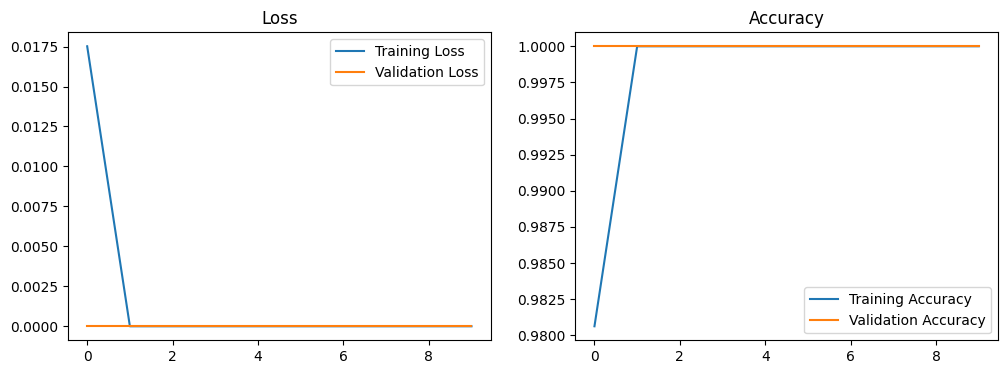

In [21]:
# Построение графиков
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()